In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Memastikan visualisasi tampil langsung pada notebook
%matplotlib inline

# Memuat dataset dari GitHub
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv'
df = pd.read_csv(url)

# Menampilkan 5 baris pertama dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# First, let's check the basic info about the dataset
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in

# Feature Engineering, EDA, dan Data Visualization pada setiap feature yang ada

Total unique shows: 8807


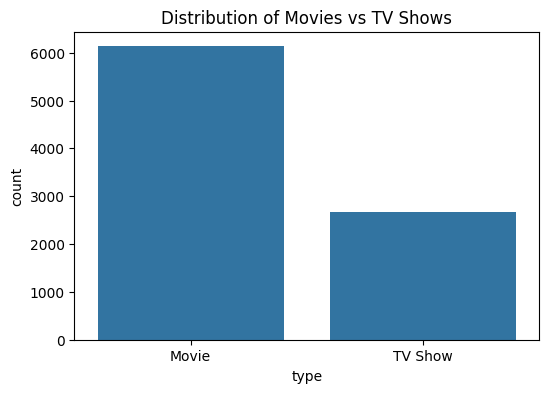

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


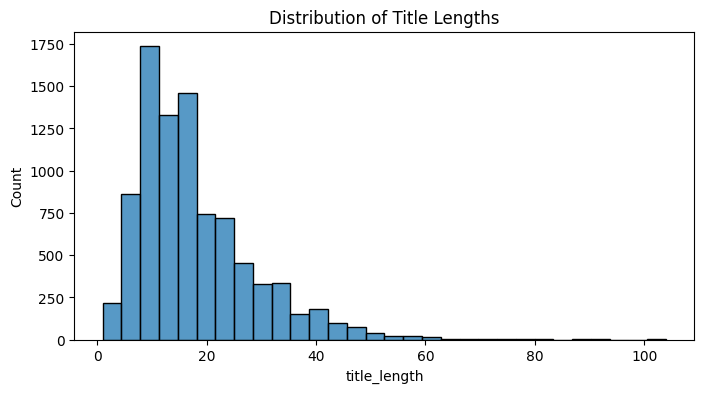

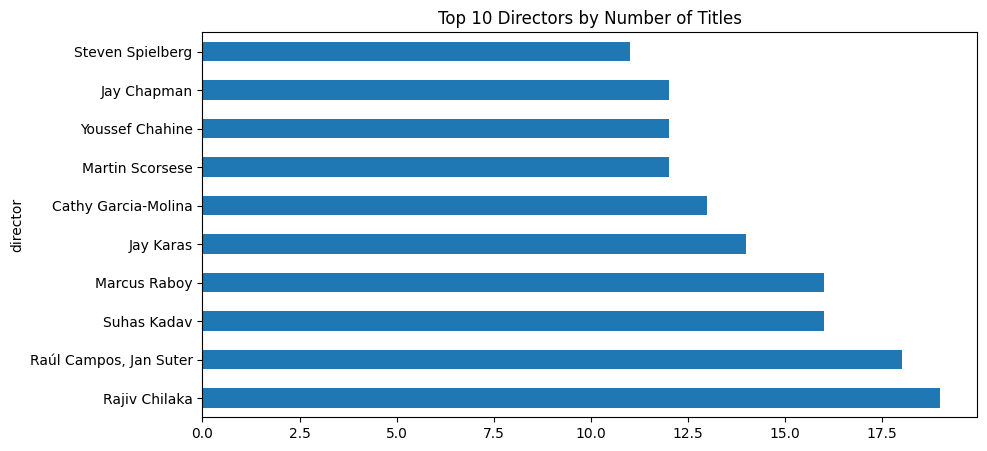

Percentage of missing directors: 29.91%


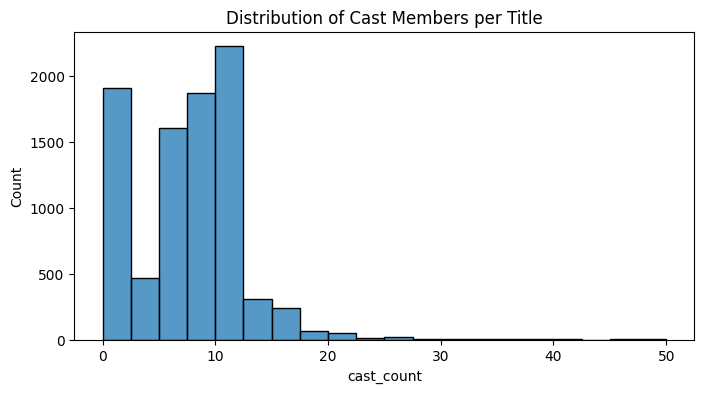

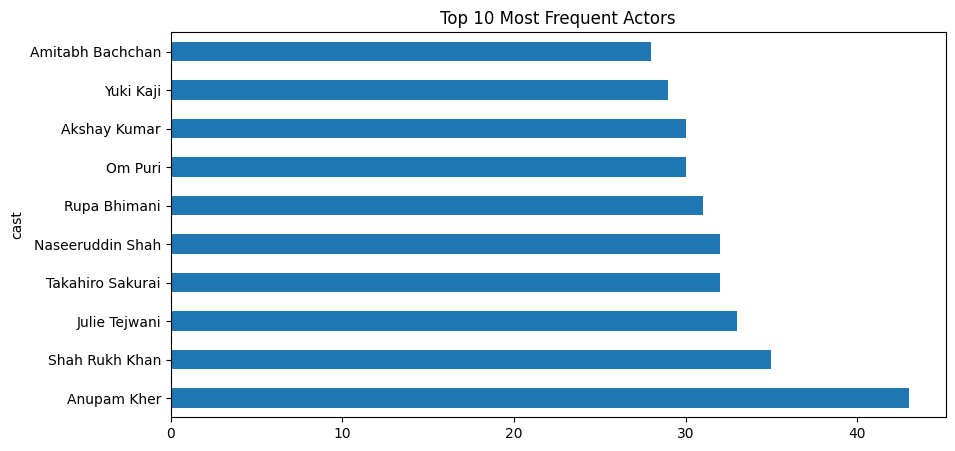

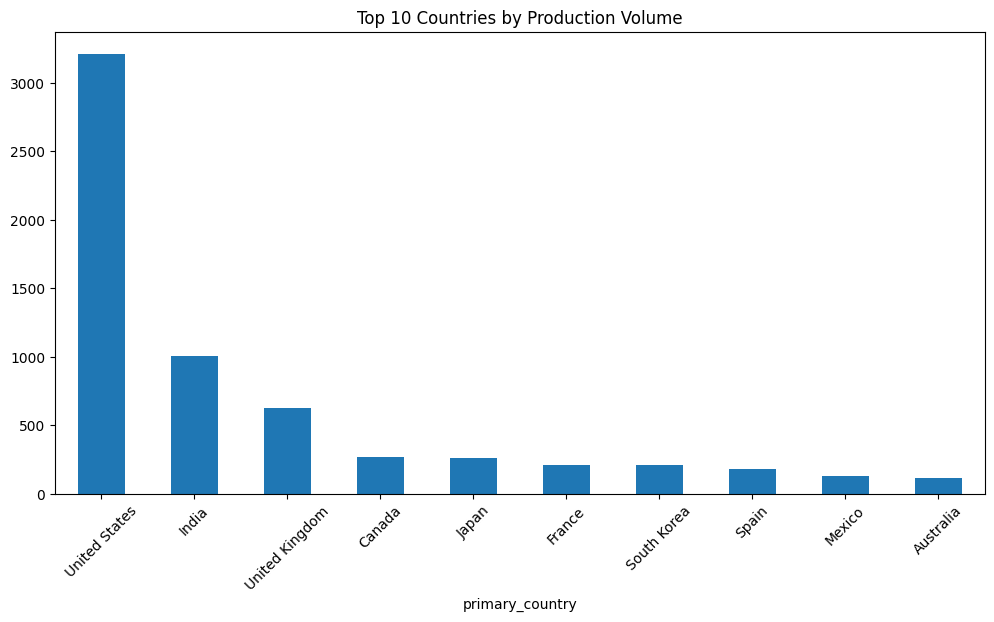

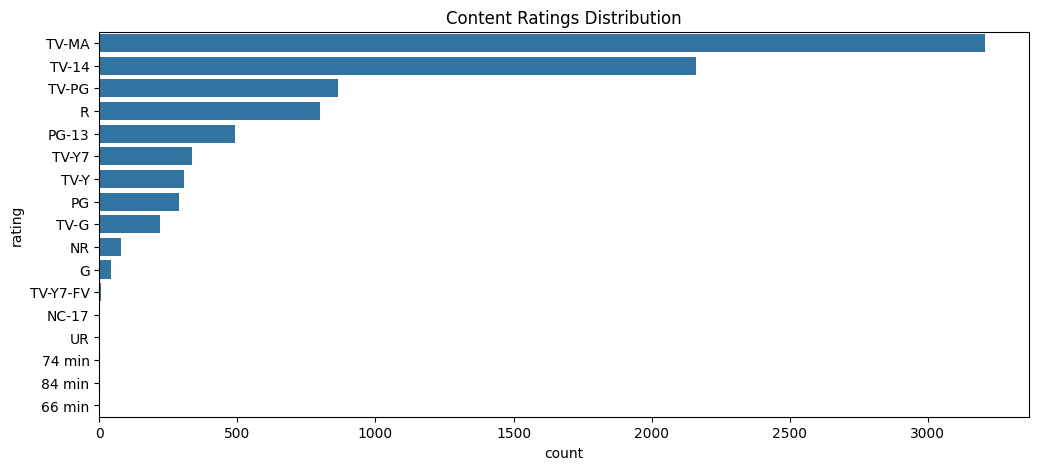

<ipython-input-9-2b6b11a7df44>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
<ipython-input-9-2b6b11a7df44>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


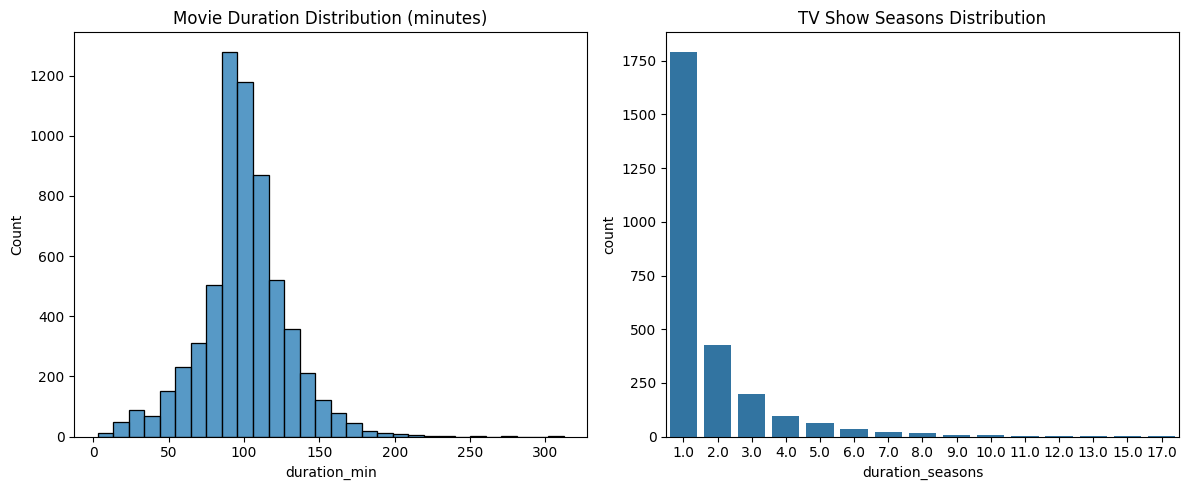

In [9]:
print(f"Total unique shows: {df['show_id'].nunique()}")
# Visualization
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Movies vs TV Shows')
plt.show()

# Percentage calculation
type_counts = df['type'].value_counts(normalize=True) * 100
print(type_counts)
# Analyzing title lengths
df['title_length'] = df['title'].apply(len)
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='title_length', bins=30)
plt.title('Distribution of Title Lengths')
plt.show()
# Top directors
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_directors.plot(kind='barh')
plt.title('Top 10 Directors by Number of Titles')
plt.show()

# Missing values handling
print(f"Percentage of missing directors: {df['director'].isnull().mean()*100:.2f}%")
# Count number of cast members per title
df['cast_count'] = df['cast'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='cast_count', bins=20)
plt.title('Distribution of Cast Members per Title')
plt.show()

# Top actors
all_actors = df['cast'].str.split(', ').explode().value_counts().head(10)
all_actors.plot(kind='barh', figsize=(10,5))
plt.title('Top 10 Most Frequent Actors')
plt.show()
# Clean and analyze countries
df['primary_country'] = df['country'].str.split(',').str[0]

plt.figure(figsize=(12,6))
df['primary_country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Production Volume')
plt.xticks(rotation=45)
plt.show()
# Visualization
plt.figure(figsize=(12,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Content Ratings Distribution')
plt.show()
# Separate movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Extract numerical duration
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data=movies, x='duration_min', bins=30, ax=axes[0])
axes[0].set_title('Movie Duration Distribution (minutes)')

sns.countplot(data=tv_shows, x='duration_seasons', ax=axes[1])
axes[1].set_title('TV Show Seasons Distribution')
plt.tight_layout()
plt.show()

# Comprehensive EDA and Data Visualization

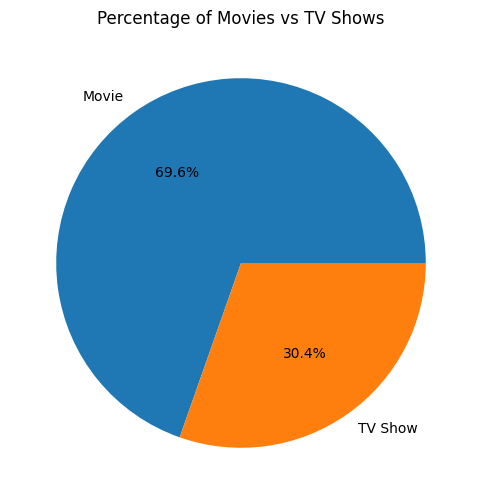

Movie Duration Statistics:
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

TV Show Seasons Statistics:
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_seasons, dtype: float64


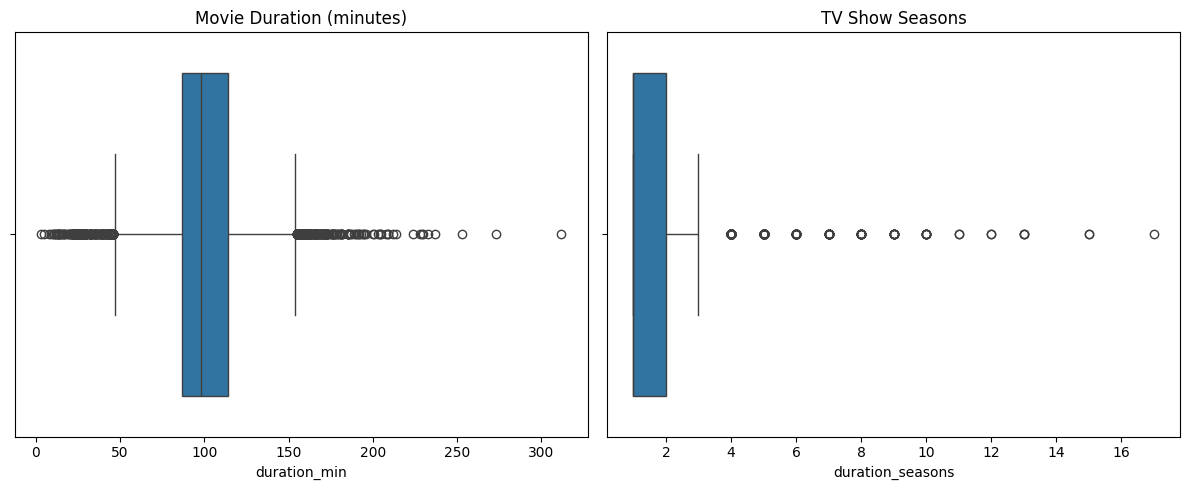

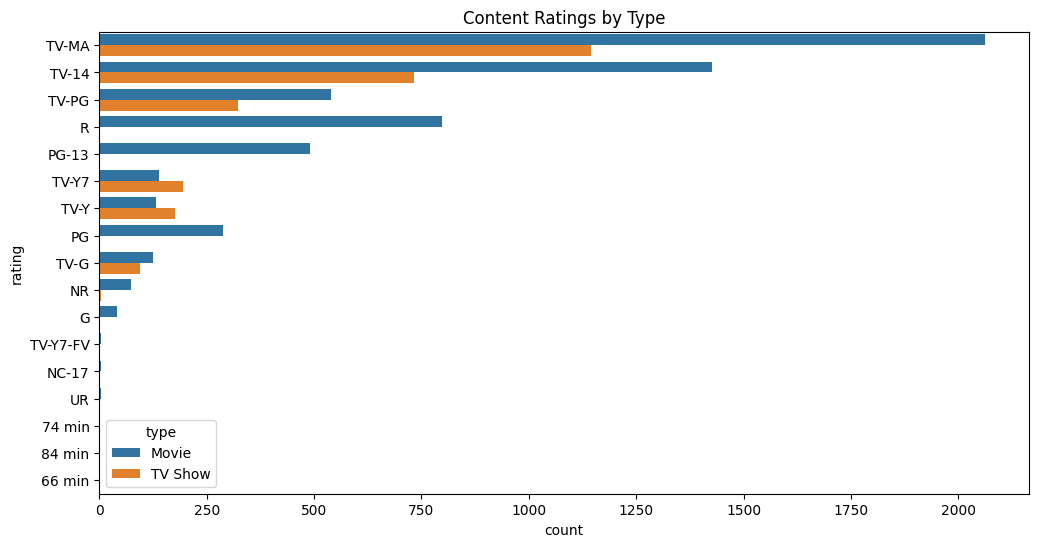

In [14]:
# Pie chart of content types
plt.figure(figsize=(6,6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Movies vs TV Shows')
plt.ylabel('')
plt.show()
# Movie duration statistics
print("Movie Duration Statistics:")
print(movies['duration_min'].describe())

# TV show seasons statistics
print("\nTV Show Seasons Statistics:")
print(tv_shows['duration_seasons'].describe())

# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(data=movies, x='duration_min', ax=axes[0])
axes[0].set_title('Movie Duration (minutes)')

sns.boxplot(data=tv_shows, x='duration_seasons', ax=axes[1])
axes[1].set_title('TV Show Seasons')
plt.tight_layout()
plt.show()
# Rating distribution by type
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Content Ratings by Type')
plt.show()

# Penjelasan matematika

Rangkuman Penjelasan Matematika untuk Analisis Netflix:

1. Statistik Dasar:

- value_counts(normalize=True) → Hitung persentase kategori: (jumlah kategori/total) × 100%

- isnull().mean() → Hitung data kosong: (null/total data) × 100%

2. Analisis Teks:

- len(title) → Jumlah karakter judul

- description.split().len() → Jumlah kata deskripsi

- cast.split(',').len() → Hitung jumlah pemain

3. Analisis Waktu:

year_added - release_year → Selisih tahun rilis dan tayang di Netflix

Visualisasi Data:

- Histogram: Distribusi frekuensi (contoh: durasi film)

- Pie chart: Persentase kategori (film vs TV show)

- Scatter plot: Hubungan 2 variabel (tahun rilis vs tahun ditambahkan)

4. Analisis Kategori:

- genre.split(',').explode().value_counts() → Hitung frekuensi genre

- combinations(genres, 2) → Cari pasangan genre yang sering muncul bersama

Intinya: Semua analisis menggunakan operasi matematika dasar (penjumlahan, pengurangan, pembagian) dan statistik sederhana untuk memahami pola data Netflix.